In [1]:
import numpy as np

In [2]:
import numpy as np
import h5py
import os
from tqdm import tqdm
from skimage import measure
from skimage.filters import gaussian
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lmosser\Anaconda\lib\site-packages\scipy\ndimage\morphology.py:214: RuntimeWarning: invalid value encountered in less_equal
  return numpy.asarray(output <= connectivity, dtype=bool)


In [55]:
f = h5py.File("berea.hdf5", 'r')
berea_img = f.items()[0][1]
subset = berea_img[50:100, 50:100, 50:100].astype(np.float64)
filtered = gaussian(subset, 1.0)

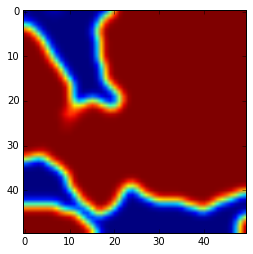

In [56]:
plt.imshow(filtered[:, :, 0])

In [57]:
verts, faces = measure.marching_cubes(filtered, 0.8)
print verts.shape, faces.shape

(17066, 3) (32922, 3)


In [20]:
vertices = []
faces = []
with open("parametric_3x3_r_1_4.ply", "r") as f:
    data_section = False
    vertices_i = 0
    vertices_count = 0
    faces_i = 0
    faces_count = 0
    faces_section = False
    for i, row in enumerate(f):
        if data_section == True:
            if vertices_i < vertices_count:
                #print row.split(" ")
                #break
                #rhino edit
                vertex = [val.strip("\n") for val in row.split(" ")]
                vertices.append(vertex)
                vertices_i += 1
                if vertices_i == vertices_count:
                    faces_section = True
            elif faces_section:
                face = [str(int(val.strip("\n"))+1) for val in row.split(" ")[1::]]
                faces.append(face)
        else:
            if i == 3:
                vertices_count = int(row.split(" ")[2])
                print vertices_count
            elif i == 7:
                faces_count = int(row.split(" ")[2])
                print faces_count
            elif row.split(" ")[0] == "end_header\n":
                data_section = True
            
        
faces = np.array(faces)
vertices = np.array(vertices)

print faces.shape
print vertices.shape
print vertices
print faces

16560
20520
(20520, 3)
(16560, 3)
[['5.020204' '6.000000' '5.000000']
 ['5.106801' '5.403183' '5.102221']
 ['5.037099' '5.356610' '5.213315']
 ..., 
 ['0.970432' '4.970432' '5.723372']
 ['0.985058' '4.985058' '5.860999']
 ['0.506394' '4.947396' '5.102221']]
[['5' '4' '2']
 ['9' '8' '4']
 ['10' '9' '5']
 ..., 
 ['16506' '16492' '16507']
 ['16508' '16560' '16509']
 ['16507' '16495' '16508']]


In [4]:
vertices = verts

NameError: name 'verts' is not defined

In [21]:
with open("parametric_3x3_r_1_4.poly", "wb") as f:
    f.write("POINTS\n")
    for i, vertex in enumerate(vertices):
        f.write(str(i+1)+": "+" ".join([str(val) for val in vertex])+"\n")
    
    f.write("POLYS\n") 
    for j, face in enumerate(faces):
        f.write(str(j+1)+": "+" ".join([str(int(val)) for val in face])+" <\n")
        
    f.write("END")

In [7]:
from collections import Counter

In [8]:
flat_faces = faces.flatten()
face_counter = Counter(flat_faces)

In [9]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [10]:
print vertices[:, 0].shape

(17066,)


IndexError: index 51365 is out of bounds for axis 0 with size 17066

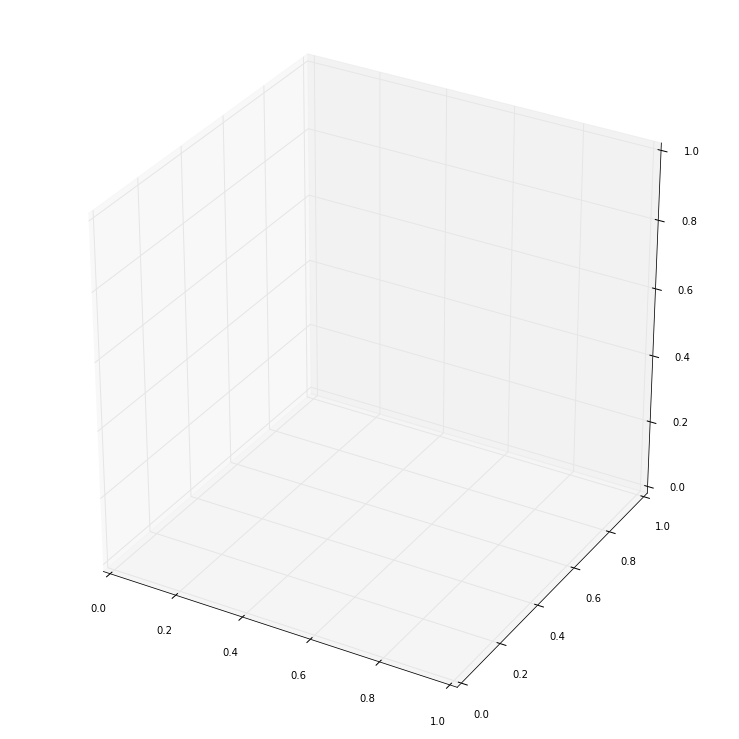

In [54]:
vertices = verts
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlim(vertices[:, 0].flatten().min(), vertices[:, 0].flatten().max())
ax.set_ylim(vertices[:, 1].flatten().min(), vertices[:, 1].flatten().max())
ax.set_zlim(vertices[:, 2].flatten().min(), vertices[:, 2].flatten().max())
plt.show()

In [12]:
import pandas as pd

In [ ]:
frames = []
for i in range(500):
    df = pd.read_csv("filtered_mink_val/, 
                          comment="#",delim_whitespace=True, 
                          names=["label","a11", "a12", "a21", "a22","eval1", "eval2", "eval2eval1",
                                 "evec1x", "evec1y","evec2x", "evec2y"])
    frames.append(df)

In [47]:
direc = "hope_mink_val//"

In [48]:
class KarambolaResults(object):
    def __init__(self, direc):
        self.direc = direc
        self.load_surface_results(self.direc)
        self.load_w000_w100_w200_w300(self.direc)
        self.load_w010_w110_w210_w310(self.direc)
        self.load_tensors(self.direc)
        self.assign_tensors()
    
    def load_surface_results(self, direc):
        temp = []
        with open(direc+"surface_props", "r") as f:
            for row in f:
                vals = [val.strip("\n") for val in row.split(" ")]
                vals = [val for val in vals if val not in ["=", ""]]
                temp.append(vals)
        self.shortest_edge = float(temp[0][2])
        self.longest_edge = float(temp[1][2])
        self.smallest_area = float(temp[2][2])
        self.largest_area = float(temp[3][2])
        self.surface_type = temp[6][1]
        
    def load_w000_w100_w200_w300(self, direc):
        temp = []
        with open(direc+"w000_w100_w200_w300", "r") as f:
            for row in f:
                vals = [val.strip("\n") for val in row.split(" ")]
                if "#" in vals:
                    pass
                else:
                    vals = [val for val in vals if val not in ["=", ""]]
                    temp.append(vals)
            
            self.w000 = float(temp[0][1])
            self.w100 = float(temp[1][1])
            self.w200 = float(temp[2][1])
            self.w300 = float(temp[3][1])
    
    def load_w010_w110_w210_w310(self, direc):
            temp = []
            with open(direc+"w010_w110_w210_w310", "r") as f:
                for row in f:
                    vals = [val.strip("\n") for val in row.split(" ")]
                    if "#" in vals:
                        pass
                    else:
                        vals = [val for val in vals if val not in ["=", ""]]
                        temp.append(vals)
                
                self.w010 = np.array([float(val) for val in temp[0][1:4]])
                self.w110 = np.array([float(val) for val in temp[1][1:4]])
                self.w210 = np.array([float(val) for val in temp[2][1:4]])
                self.w310 = np.array([float(val) for val in temp[3][1:4]])
                
    def load_tensors(self, direc):
        self.tensors = {}
        tensor_names = ["w020", "w102", "w120", "w202", "w220", "w320"]
        for tensor_name in tensor_names:
            temp = []
            with open(direc+tensor_name, "r") as f:
                for row in f:
                    vals = [val.strip("\n") for val in row.split(" ")]
                    if "#" in vals:
                        pass
                    else:
                        vals = [val for val in vals if val not in ["=", ""]]
                        temp.append(vals)
                self.tensors[tensor_name] = np.array([float(val) for val in temp[0][1:10]]).reshape(3,3)
    def assign_tensors(self):
        self.w020 = self.tensors["w020"]
        self.w102 = self.tensors["w102"]
        self.w120 = self.tensors["w120"]
        self.w220 = self.tensors["w220"]
        self.w202 = self.tensors["w202"]

In [49]:
k = KarambolaResults(direc)
#k.load_surface_results(direc)
print k.shortest_edge, k.longest_edge, k.smallest_area, k.largest_area, k.surface_type
#k.load_w000_w100_w200_w300(direc)
print k.w000, k.w100, k.w200, k.w300
#k.load_w010_w110_w210_w310(direc)
print k.w010
print k.w110
print k.w210
print k.w310
#k.load_tensors(direc)
#k.assign_tensors()
print k.tensors
print ""
print k.w020

0.000159484 0.858676 3.21649e-08 0.210143 open
5435.50732758 3623.2165865 195.141005804 2454.63106
[ 148066.273154   461834.042433   -53389.4829321]
[ 90855.1094183  86311.6308591  88898.7198415]
[ 4818.31353817  5380.47392163  5615.30165547]
[ 70038.2168413  62893.4668539  56887.4856198]
{'w320': array([[ 2872301.60867,  1731239.99311,  1716758.57716],
       [ 1731239.99311,  2465335.10147,  1490387.29181],
       [ 1716758.57716,  1490387.29181,  2014114.14504]]), 'w202': array([[ 65.72282674,  12.01437354, -12.39088384],
       [ 12.01437354,  59.40721087,   5.07698397],
       [-12.39088384,   5.07698397,  70.01096819]]), 'w220': array([[ 145704.266053,  140583.982073,  135690.783307],
       [ 140583.982073,  183566.785166,  153087.796796],
       [ 135690.783307,  153087.796796,  189160.585821]]), 'w102': array([[ 1370.31528078,    65.61253858,  -147.6748166 ],
       [   65.61253858,  1094.39034581,    37.92950062],
       [ -147.6748166 ,    37.92950062,  1158.5109599 ]]), 'w0

In [50]:
eigs = np.linalg.eig(k.w220)
eigs_w102 = np.linalg.eig(k.w102)
beta_102 = min(eigs_w102[0])/max(eigs_w102[0])
gamma_102 = sorted(eigs_w102[0])[1]/max(eigs_w102[0])
eigs_w202 = np.linalg.eig(k.w202)
beta_202 = min(eigs_w202[0])/max(eigs_w202[0])
gamma_202 = sorted(eigs_w202[0])[1]/max(eigs_w202[0])
print beta_102, beta_202
print gamma_102, gamma_202

0.704835740037 0.54744335593
0.7921943671 0.850765205945


In [51]:
center_x = (vertices[:, 0].flatten().max()-vertices[:, 0].flatten().min())/2.
center_y = (vertices[:, 1].flatten().max()-vertices[:, 1].flatten().min())/2.
center_z = (vertices[:, 2].flatten().max()-vertices[:, 2].flatten().min())/2.

eig_vecs = eigs[1]
print eig_vecs.shape
center = np.array([center_x, center_y, center_z])
eig_vecs = np.vstack((eig_vecs, center))
eig_vecs = np.vstack((eig_vecs, center))
eig_vecs = np.vstack((eig_vecs, center))
eig_vecs = eig_vecs
print eig_vecs.shape

print eig_vecs
X = eig_vecs[0:3, 0]
Y = eig_vecs[0:3, 1]
Z = eig_vecs[0:3, 2]

U = eig_vecs[3::, 0]
V = eig_vecs[3::, 1]
W = eig_vecs[3::, 2]

(3, 3)
(6, 3)
[[ -0.52712197  -0.78413591  -0.32752603]
 [ -0.59997645   0.61635849  -0.51002987]
 [ -0.60180619   0.07234004   0.79535918]
 [ 24.5         24.5         24.5       ]
 [ 24.5         24.5         24.5       ]
 [ 24.5         24.5         24.5       ]]


In [52]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


IndexError: index 51365 is out of bounds for axis 0 with size 17066

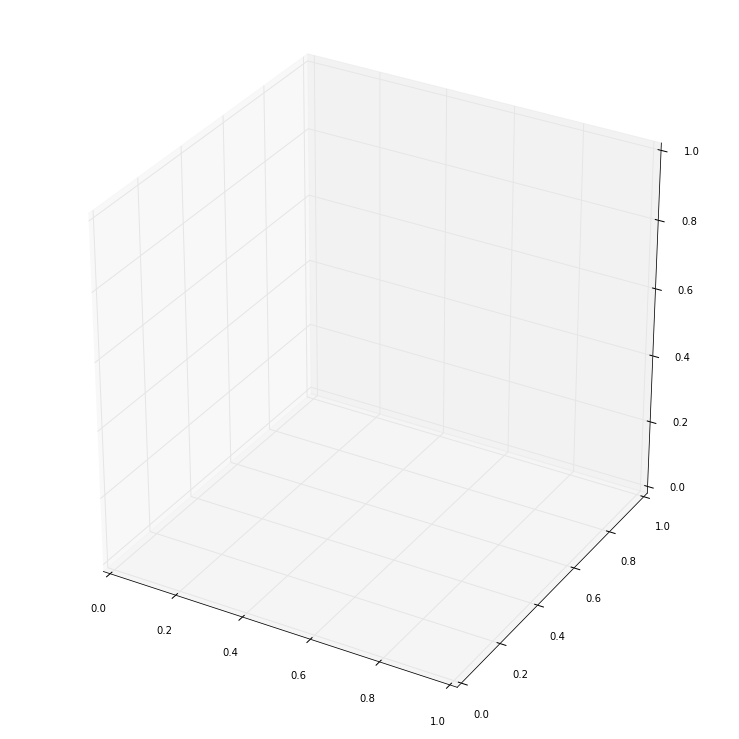

In [53]:
vertices = verts
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)
#ax.quiver(X, Y, Z, U, V, W)
L = 20.
eig_vals_1 = eig_vecs[0][0]/max(eig_vecs[0])
eig_vals_2 = eig_vecs[0][1]/max(eig_vecs[0])
eig_vals_3 = eig_vecs[0][2]/max(eig_vecs[0])

a = Arrow3D([center_x, center_x+eig_vecs[0, 0]*L*eig_vals_1],[center_y, center_y+eig_vecs[1, 0]*L*eig_vals_1], [center_z, center_z+eig_vecs[2, 0]*L*eig_vals_1], mutation_scale=20, lw=1, arrowstyle="-|>", color="red")
ax.add_artist(a)

b = Arrow3D([center_x, center_x+eig_vecs[0, 1]*L*eig_vals_2],[center_y, center_y+eig_vecs[1, 1]*L*eig_vals_2], [center_z, center_z+eig_vecs[2, 1]*L*eig_vals_2], mutation_scale=20, lw=1, arrowstyle="-|>", color="green")
ax.add_artist(b)

c = Arrow3D([center_x, center_x+eig_vecs[0, 2]*L*eig_vals_3],[center_y, center_y+eig_vecs[1, 2]*L*eig_vals_3], [center_z, center_z+eig_vecs[2, 2]*L*eig_vals_3], mutation_scale=20, lw=1, arrowstyle="-|>", color="magenta")
ax.add_artist(c)

ax.set_xlim(vertices[:, 0].flatten().min(), vertices[:, 0].flatten().max())
ax.set_ylim(vertices[:, 1].flatten().min(), vertices[:, 1].flatten().max())
ax.set_zlim(vertices[:, 2].flatten().min(), vertices[:, 2].flatten().max())
plt.show()

In [20]:
import trimesh

Traceback (most recent call last):
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\base.py", line 37, in <module>
    from .path.io.misc import faces_to_path
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\path\__init__.py", line 1, in <module>
    from .path import Path2D, Path3D
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\path\path.py", line 16, in <module>
    from .polygons  import polygons_enclosure_tree, medial_axis, polygon_hash, path_to_polygon, polygon_obb
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\path\polygons.py", line 2, in <module>
    from rtree            import Rtree
ImportError: No module named rtree
Traceback (most recent call last):
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\io\load.py", line 19, in <module>
    from ..path.io.load import load_path, path_formats
  File "C:\Users\lmosser\Anaconda\lib\site-packages\trimesh\path\__init__.py", line 1, in <module>
    from .path import Path2D, Path

In [21]:
mesh = trimesh.Trimesh()

In [22]:
mesh.vertices = vertices
mesh.faces =  faces
print mesh.is_empty
mesh.show()

False


<trimesh.scene.scene.Scene instance at 0x0D5D6490>

In [23]:
print mesh.is_watertight

False


In [24]:
meshes = mesh.split(only_watertight=False)
print meshes

In [25]:
for mesh_i in meshes:
    mesh_i.show()

In [26]:
sorted_meshes = sorted(meshes, key=lambda x: len(x.vertices))

In [27]:
print sorted_meshes[-1].vertices.shape
print [val.vertices.shape for val in sorted_meshes]
mesh_out = sorted_meshes[-1]

(16939, 3)
[(4, 3), (10, 3), (18, 3), (29, 3), (66, 3), (16939, 3)]


In [28]:
"""fixed_holes = mesh_out.remove_degenerate_faces()
print fixed_holes
fixed_holes = mesh_out.remove_duplicate_faces()
print fixed_holes
fixed_holes = mesh_out.remove_unreferenced_vertices()
print fixed_holes
face_counter = Counter(mesh_out.face.flatten())
print face_counter"""

'fixed_holes = mesh_out.remove_degenerate_faces()\nprint fixed_holes\nfixed_holes = mesh_out.remove_duplicate_faces()\nprint fixed_holes\nfixed_holes = mesh_out.remove_unreferenced_vertices()\nprint fixed_holes\nface_counter = Counter(mesh_out.face.flatten())\nprint face_counter'

In [29]:
vertices = mesh_out.vertices
faces = mesh_out.faces
with open("hope.poly", "wb") as f:
    f.write("POINTS\n")
    for i, vertex in enumerate(vertices):
        f.write(str(i+1)+": "+" ".join([str(val) for val in vertex])+"\n")
    
    f.write("POLYS\n") 
    for j, face in enumerate(faces):
        f.write(str(j+1)+": "+" ".join([str(val+1) for val in face])+" <\n")
        
    f.write("END")

In [30]:
def get_faces(mesh, vertex_id):
    faces = [i  for i, face in enumerate(mesh.faces) if vertex_id in face]
    return faces

In [32]:
gotten_faces = get_faces(mesh_out, 0)
for face in gotten_faces:
    print mesh_out.faces[face]

[    0 17053 51365]
[    0 51365 51485]
[    0 51485 17017]


In [ ]:
for(unsigned int i = 0; i<surface.n_vertices();i++){
        
        unsigned int sum_of_triangles = 1;
        
        if (surface.get_triangles_of_vertex(i).size() == 0) break;
    
        unsigned int start_triangle = surface.get_triangles_of_vertex(i).at(0);
        unsigned int new_triangle = surface.get_triangles_of_vertex(i).at(0);

        bool neigh_un = false;

        for (unsigned int j = 0; j< surface.get_triangles_of_vertex(i).size();j++){
            
            unsigned int triangle = new_triangle;
            unsigned int vertex_id = 0;
            
            for (unsigned int k = 0; k < 3; k++){
                if(surface.ith_vertex_of_triangle(triangle,k)==i){
                    vertex_id = k;
                }
            }


            if (surface.ith_neighbour_of_triangle(triangle,vertex_id) == NEIGHBOUR_UNASSIGNED){ neigh_un = true; break;}
            
            new_triangle = surface.ith_neighbour_of_triangle(triangle,vertex_id);
            
            if (new_triangle == start_triangle) break;
            
            sum_of_triangles+=1;
        }


        if(surface.get_triangles_of_vertex(i).size() != sum_of_triangles && neigh_un == false){
            throw std::runtime_error ("your polyfile is damaged\n"
                      "there are more than one objects at one vertex\n");
        }
}

In [45]:
def check_mesh(mesh, vertex_faces):
    vertices = mesh.vertices
    faces = mesh.faces
    for i, vertex in enumerate(vertices):
        sum_of_triangles = 1
        vertex_triangles = vertex_faces[i]
        if len(vertex_triangles) == 0:
            break
        
        start_triangle = vertex_triangles[0]
        #new_triangle = vertex_triangles[0]

        neigh_un = False

        for new_triangle in vertex_triangles:
            if new_triangle is not start_triangle:
                sum_of_triangles += 1
                
        if len(vertex_triangles) is not sum_of_triangles:
            print "nope", i

In [46]:
check_mesh(mesh_out, vertex_faces)

In [36]:
import networkx as nx

In [37]:
graph = nx.Graph()

In [39]:
for i, vertex in enumerate(mesh_out.vertices):
    graph.add_node(i)

for i, face in enumerate(mesh_out.faces):
    graph.add_edges_from

In [43]:
vertex_faces = {}
for i, vertex in enumerate(mesh_out.vertices):
    vertex_faces[i] = []

print len(vertex_faces)
for i, face in enumerate(mesh_out.faces):
    for vertex in face:
        if i not in vertex_faces[vertex]:
            vertex_faces[vertex].append(i)



66664
[0, 8, 12]


In [44]:
vertex_face_counts = Counter([len(val) for key, val in vertex_faces.iteritems()])
print vertex_face_counts

Counter({6: 54674, 5: 3759, 7: 3310, 3: 1817, 4: 1443, 8: 1211, 2: 274, 9: 153, 1: 14, 10: 7, 11: 1, 12: 1})
